In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchviz import make_dot

In [5]:
def linear(x, w, b):
    y = torch.matmul(x, w) + b
    return y

x = torch.tensor([[1, 2, 3],
                  [2, 4, 6]]).float()
print(x)
w1 = torch.rand(3, 4)
b1 = torch.ones(1, 4)
print(w1)
print(b1)

tensor([[1., 2., 3.],
        [2., 4., 6.]])
tensor([[0.1320, 0.6652, 0.5713, 0.2331],
        [0.3105, 0.6852, 0.5527, 0.7901],
        [0.9400, 0.7322, 0.0519, 0.0744]])
tensor([[1., 1., 1., 1.]])


In [16]:
h1 = linear(x, w1, b1)
print(h1)

w2 = torch.rand(4, 3)
b2 = torch.ones(1, 3)

h2 = linear(h1, w2, b2)
print(h2)

tensor([[4.5730, 5.2323, 2.8324, 3.0366],
        [8.1460, 9.4646, 4.6649, 5.0733]])
tensor([[ 6.8428,  7.2298,  8.6579],
        [11.3802, 11.7864, 14.0268]])


In [23]:
input = torch.randn(1, requires_grad=True)
target = torch.randn(1)

print('input :', input.data.numpy())
print('target :', target.data.numpy())

loss = nn.MSELoss()
optimizer = optim.SGD([input], lr=0.02)

for epoch in range(100):
    loss_result = loss(input, target)
    print("loss_result :", loss_result.data.numpy())

    optimizer.zero_grad()
    loss_result.backward()
    optimizer.step()

print('input :', input.data.numpy())
print('target :', target.data.numpy())

input : [1.6249084]
target : [0.2688221]
loss_result : 1.8389703
loss_result : 1.694795
loss_result : 1.561923
loss_result : 1.4394683
loss_result : 1.3266139
loss_result : 1.2226074
loss_result : 1.1267548
loss_result : 1.0384172
loss_result : 0.9570053
loss_result : 0.881976
loss_result : 0.812829
loss_result : 0.7491032
loss_result : 0.69037354
loss_result : 0.63624835
loss_result : 0.5863666
loss_result : 0.5403954
loss_result : 0.49802837
loss_result : 0.45898286
loss_result : 0.42299867
loss_result : 0.38983548
loss_result : 0.35927242
loss_result : 0.33110547
loss_result : 0.3051468
loss_result : 0.2812233
loss_result : 0.25917536
loss_result : 0.23885606
loss_result : 0.22012973
loss_result : 0.20287156
loss_result : 0.18696642
loss_result : 0.17230827
loss_result : 0.1587993
loss_result : 0.14634944
loss_result : 0.13487567
loss_result : 0.12430142
loss_result : 0.11455618
loss_result : 0.10557496
loss_result : 0.09729789
loss_result : 0.089669734
loss_result : 0.08263963
loss

x: 
 tensor([-3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.3842e-08,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7000e+00,  2.8000e+00,  2.9000e+00])
y: 
 tensor([-5.0000, -4.8000, -4.6000, -4.4000, -4.2000, -4.0000, -3.8000, -3.6000,
        -3.4000, -3.2000, -3.0000

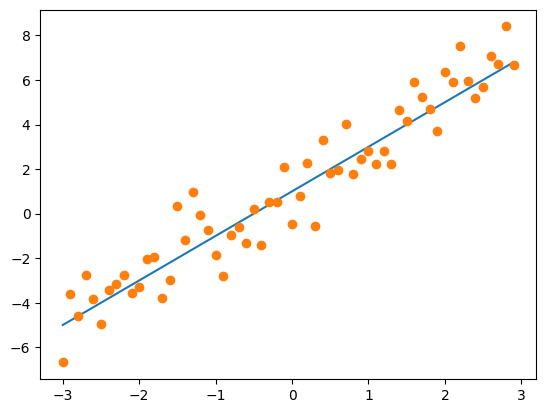

In [25]:
x = torch.arange(-3, 3, 0.1)
y = 2*x + 1
y1 = 2*x + 1 + torch.randn(x.shape)

print('x: \n', x)
print('y: \n', y)

plt.plot(x.numpy(), y.numpy())
plt.plot(x.numpy(), y1.numpy(), "o")
plt.show()

In [40]:
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print("Initial value = \n", "="*50)
print("a: ", a)
print("b: ", b)
print("="*50)

lr = 0.01
loss = nn.MSELoss()
optimizer = optim.SGD([a, b], lr=lr)

n_epochs = 100

for epoch in range(n_epochs):
    yhat = a*x + b
    loss_result = loss(yhat, y1)
    if epoch % 10 == 0:
        print('epoch', epoch, "a=", a.item(), "b=", b.item(),
              'loss=', loss_result.item())
    optimizer.zero_grad()
    loss_result.backward()
    optimizer.step()

print("="*50)
print("After SGD =")
print("a: ", a)
print("b: ", b)

Initial value = 
a:  tensor([-0.2398], requires_grad=True)
b:  tensor([0.4351], requires_grad=True)
epoch 0 a= -0.23981718719005585 b= 0.43511679768562317 loss= 17.113670349121094
epoch 10 a= 0.8081504106521606 b= 0.5466009974479675 loss= 6.003225803375244
epoch 20 a= 1.3732097148895264 b= 0.6449899673461914 loss= 2.712878465652466
epoch 30 a= 1.67815363407135 b= 0.729317307472229 loss= 1.7119981050491333
epoch 40 a= 1.8429391384124756 b= 0.8003443479537964 loss= 1.3902603387832642
epoch 50 a= 1.9321630001068115 b= 0.8595280647277832 loss= 1.2758396863937378
epoch 60 a= 1.9806180000305176 b= 0.9085085391998291 loss= 1.2285274267196655
epoch 70 a= 2.007049798965454 b= 0.9488680958747864 loss= 1.205361008644104
epoch 80 a= 2.0215630531311035 b= 0.9820302128791809 loss= 1.1923315525054932
epoch 90 a= 2.029608726501465 b= 1.009228229522705 loss= 1.18433678150177
After SGD =
a:  tensor([2.0341], requires_grad=True)
b:  tensor([1.0315], requires_grad=True)


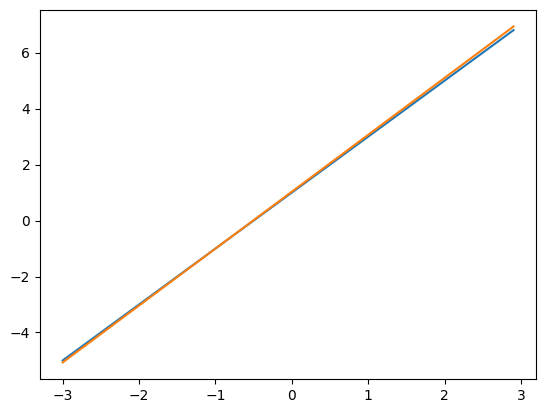

In [49]:
yhat = a*x + b

plt.plot(x.numpy(), y.numpy())
plt.plot(x.numpy(), yhat.data.numpy())
plt.show()

In [50]:
l1 = nn.Linear(784, 128)
l2 = nn.Linear(128, 10)
relu = nn.ReLU(inplace=True)

In [51]:
inputs = torch.randn(100, 784)
m1 = l1(inputs)
m2 = relu(m1)
outputs = l2(m2)

print(inputs.shape)
print(outputs.shape)

torch.Size([100, 784])
torch.Size([100, 10])


In [52]:
net2 = nn.Sequential(
    l1,
    relu,
    l2
)

outputs2 = net2(inputs)

print(inputs.shape)
print(outputs.shape)

torch.Size([100, 784])
torch.Size([100, 10])


In [61]:
np.random.seed(123)
x = np.random.randn(100, 1)
y = x**2 + np.random.randn(100, 1)*0.2

x_train = x[:50, :]
x_test = x[50:, :]
y_train = y[:50, :]
y_test = y[50:, :]

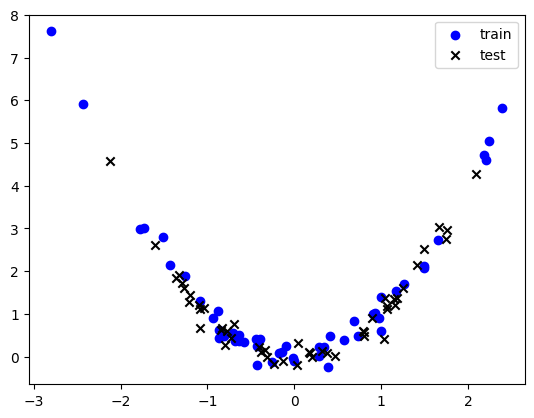

In [63]:
plt.scatter(x_train, y_train, c='b', label='train')
plt.scatter(x_test, y_test, c='k', marker='x', label='test')
plt.legend()
plt.show()

In [64]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

In [67]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1, 1)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

In [68]:
lr = 0.01
net = Net()
optimizer = optim.SGD(net.parameters(), lr=lr)
criterion = nn.MSELoss()
num_epochs = 10000
history = np.zeros((0, 2))

In [69]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch%100==0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f"epoch = {epoch} loss = {loss.item():.5f}")

epoch = 0 loss = 6.02774
epoch = 100 loss = 3.24501
epoch = 200 loss = 3.19717
epoch = 300 loss = 3.19633
epoch = 400 loss = 3.19631
epoch = 500 loss = 3.19631
epoch = 600 loss = 3.19631
epoch = 700 loss = 3.19631
epoch = 800 loss = 3.19631
epoch = 900 loss = 3.19631
epoch = 1000 loss = 3.19631
epoch = 1100 loss = 3.19631
epoch = 1200 loss = 3.19631
epoch = 1300 loss = 3.19631
epoch = 1400 loss = 3.19631
epoch = 1500 loss = 3.19631
epoch = 1600 loss = 3.19631
epoch = 1700 loss = 3.19631
epoch = 1800 loss = 3.19631
epoch = 1900 loss = 3.19631
epoch = 2000 loss = 3.19631
epoch = 2100 loss = 3.19631
epoch = 2200 loss = 3.19631
epoch = 2300 loss = 3.19631
epoch = 2400 loss = 3.19631
epoch = 2500 loss = 3.19631
epoch = 2600 loss = 3.19631
epoch = 2700 loss = 3.19631
epoch = 2800 loss = 3.19631
epoch = 2900 loss = 3.19631
epoch = 3000 loss = 3.19631
epoch = 3100 loss = 3.19631
epoch = 3200 loss = 3.19631
epoch = 3300 loss = 3.19631
epoch = 3400 loss = 3.19631
epoch = 3500 loss = 3.19631
epoc

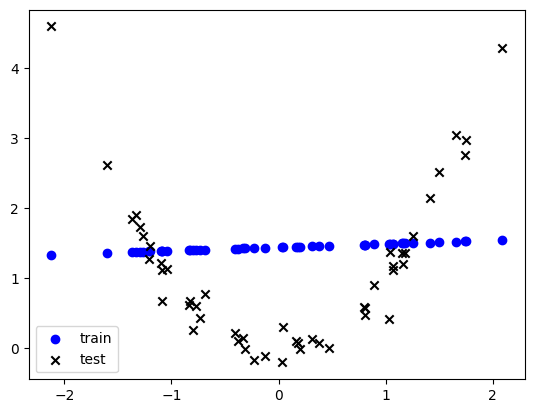

In [84]:
labels_pred = net(inputs_test)

plt.scatter(inputs_test[:, 0], labels_pred[:, 0].data, c='b', label='train')
plt.scatter(inputs_test[:, 0], labels_test[:, 0], c='k', marker='x', label='test')
plt.legend()
plt.show()

In [85]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()

        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10, 1)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.l2(x1)
        x3 = self.l3(x2)
        return x3

In [86]:
lr = 0.01
net2 = Net2()
optimizer = optim.SGD(net2.parameters(), lr=lr)
criterion = nn.MSELoss()
num_epochs = 10000
history = np.zeros((0, 2))

In [87]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net2(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch%100==0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f"epoch = {epoch} loss = {loss.item():.5f}")

epoch = 0 loss = 5.14165
epoch = 100 loss = 3.19631
epoch = 200 loss = 3.19631
epoch = 300 loss = 3.19631
epoch = 400 loss = 3.19631
epoch = 500 loss = 3.19631
epoch = 600 loss = 3.19631
epoch = 700 loss = 3.19631
epoch = 800 loss = 3.19631
epoch = 900 loss = 3.19631
epoch = 1000 loss = 3.19631
epoch = 1100 loss = 3.19631
epoch = 1200 loss = 3.19631
epoch = 1300 loss = 3.19631
epoch = 1400 loss = 3.19631
epoch = 1500 loss = 3.19631
epoch = 1600 loss = 3.19631
epoch = 1700 loss = 3.19631
epoch = 1800 loss = 3.19631
epoch = 1900 loss = 3.19631
epoch = 2000 loss = 3.19631
epoch = 2100 loss = 3.19631
epoch = 2200 loss = 3.19631
epoch = 2300 loss = 3.19631
epoch = 2400 loss = 3.19631
epoch = 2500 loss = 3.19631
epoch = 2600 loss = 3.19631
epoch = 2700 loss = 3.19631
epoch = 2800 loss = 3.19631
epoch = 2900 loss = 3.19631
epoch = 3000 loss = 3.19631
epoch = 3100 loss = 3.19631
epoch = 3200 loss = 3.19631
epoch = 3300 loss = 3.19631
epoch = 3400 loss = 3.19631
epoch = 3500 loss = 3.19631
epoc

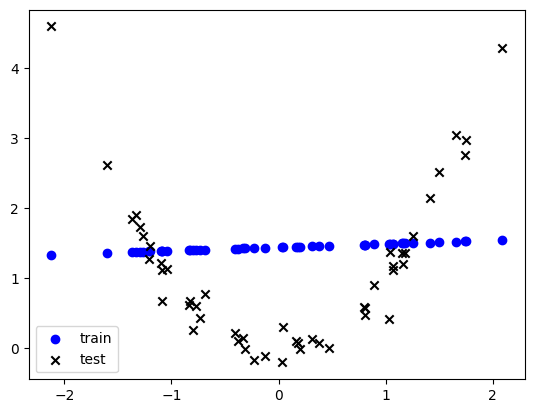

In [88]:
labels_pred2 = net2(inputs_test)

plt.scatter(inputs_test[:, 0], labels_pred2[:, 0].data, c='b', label='train')
plt.scatter(inputs_test[:, 0], labels_test[:, 0], c='k', marker='x', label='test')
plt.legend()
plt.show()

In [89]:
class Net3(nn.Module):
    def __init__(self):
        super().__init__()

        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10, 1)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.relu(self.l1(x))
        x2 = self.relu(self.l2(x1))
        x3 = self.l3(x2)
        return x3

In [90]:
lr = 0.01
net3 = Net3()
optimizer = optim.SGD(net3.parameters(), lr=lr)
criterion = nn.MSELoss()
num_epochs = 10000
history = np.zeros((0, 2))

In [91]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net3(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch%100==0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f"epoch = {epoch} loss = {loss.item():.5f}")

epoch = 0 loss = 5.01234
epoch = 100 loss = 0.48370
epoch = 200 loss = 0.12944
epoch = 300 loss = 0.09505
epoch = 400 loss = 0.07830
epoch = 500 loss = 0.06780
epoch = 600 loss = 0.06382
epoch = 700 loss = 0.06157
epoch = 800 loss = 0.06049
epoch = 900 loss = 0.05926
epoch = 1000 loss = 0.05703
epoch = 1100 loss = 0.05592
epoch = 1200 loss = 0.05271
epoch = 1300 loss = 0.05007
epoch = 1400 loss = 0.04862
epoch = 1500 loss = 0.04762
epoch = 1600 loss = 0.04649
epoch = 1700 loss = 0.04561
epoch = 1800 loss = 0.04457
epoch = 1900 loss = 0.04380
epoch = 2000 loss = 0.04051
epoch = 2100 loss = 0.03799
epoch = 2200 loss = 0.03645
epoch = 2300 loss = 0.03544
epoch = 2400 loss = 0.03486
epoch = 2500 loss = 0.03469
epoch = 2600 loss = 0.03454
epoch = 2700 loss = 0.03425
epoch = 2800 loss = 0.03404
epoch = 2900 loss = 0.03391
epoch = 3000 loss = 0.03383
epoch = 3100 loss = 0.03373
epoch = 3200 loss = 0.03365
epoch = 3300 loss = 0.03358
epoch = 3400 loss = 0.03351
epoch = 3500 loss = 0.03345
epoc

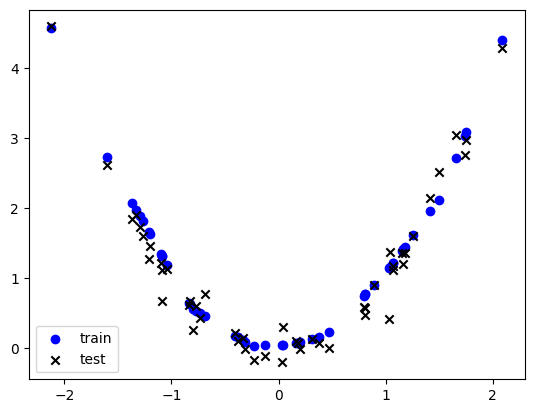

In [92]:
labels_pred3 = net3(inputs_test)

plt.scatter(inputs_test[:, 0], labels_pred3[:, 0].data, c='b', label='train')
plt.scatter(inputs_test[:, 0], labels_test[:, 0], c='k', marker='x', label='test')
plt.legend()
plt.show()

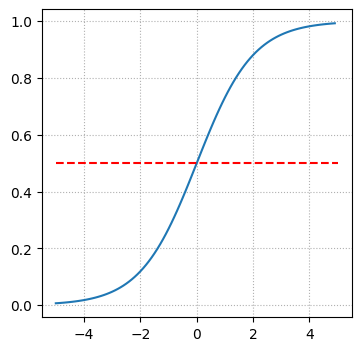

In [94]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

fig, axes = plt.subplots(figsize=(4, 4))
plt.plot(x, y)
plt.grid(linestyle=':')
plt.hlines(0.5, -5, 5, colors='r', linestyles='dashed')
plt.show()

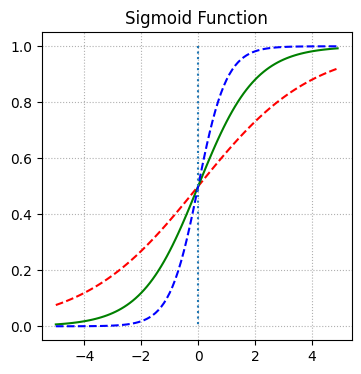

In [95]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

fig, axes = plt.subplots(figsize=(4, 4))
plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.grid(linestyle=':')
plt.title('Sigmoid Function')
plt.show()

In [100]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

print(W)
print(b)

def prob(x, w, b):
    y = 1/(1+torch.exp(-(torch.matmul(x, w) + b)))
    return y

prob = prob(x_train, W, b)

print(prob)

losses = -(y_train*torch.log(prob) + (1 - y_train)*torch.log(1 - prob))
cost = losses.mean()
print(losses)
print(cost)

torch.Size([6, 2])
torch.Size([6, 1])
tensor([[0.],
        [0.]], requires_grad=True)
tensor([0.], requires_grad=True)
tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)
tensor(0.6931, grad_fn=<MeanBackward0>)


In [105]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

loss = nn.BCELoss()
sigmoid = nn.Sigmoid()

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

lr = 1
optimizer = optim.SGD([W, b], lr=lr)

nb_epochs = 1000

for epoch in range(nb_epochs+1):
    prediction = sigmoid(x_train.matmul(W) + b)
    cost = loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100 == 0:
        print(f'Epoch {epoch:4d}/{nb_epochs} Cost: {cost.item():.6f}')

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [110]:
def softmax(x):
    y = np.exp(x)/np.sum(np.exp(x))
    return y

x = torch.rand(1, 4)
print('Tensor x = \n', x)
print(x.numpy())

prob = softmax(x.numpy())

print("Softmax = \n", prob)

Tensor x = 
 tensor([[0.6000, 0.9731, 0.8087, 0.6104]])
[[0.5999802  0.97306156 0.8086528  0.61042035]]
Softmax = 
 [[0.21300438 0.3093255  0.26243025 0.21523982]]


In [136]:
x = torch.rand(3, 5, requires_grad=True)
print(x)
prob = F.softmax(x, dim=1)
print(prob)

y = torch.randint(5, (3,))
print(y)

y_one_hot = torch.zeros_like(x)
print(y_one_hot)
y_one_hot.scatter_(dim=1, index=y.unsqueeze(dim=1), value=1)
print(y_one_hot)

cost = (-y_one_hot*torch.log(prob)).sum(dim=1).mean()
print(cost.item())

tensor([[0.0168, 0.7200, 0.5222, 0.5799, 0.2671],
        [0.7842, 0.7242, 0.8405, 0.3037, 0.2377],
        [0.4610, 0.8108, 0.8645, 0.1791, 0.5006]], requires_grad=True)
tensor([[0.1296, 0.2617, 0.2148, 0.2275, 0.1664],
        [0.2383, 0.2244, 0.2520, 0.1474, 0.1379],
        [0.1751, 0.2484, 0.2622, 0.1321, 0.1822]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2, 3])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]])
1.5809154510498047


In [137]:
torch.log(F.softmax(x, dim=1))
F.log_softmax(x, dim=1)
cost = (y_one_hot* -F.log_softmax(x, dim=1)).sum(dim=1).mean()

F.nll_loss(F.log_softmax(x, dim=1), y)
F.cross_entropy(x, y)

tensor(1.5809, grad_fn=<NllLossBackward0>)

In [173]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

print(x_train.shape)
print(y_train.shape)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)
lr = 0.1
optimizer = optim.SGD([W, b], lr=lr)

nb_epochs = 10000

for epoch in range(nb_epochs+1):

    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)
    cost = (y_one_hot*-torch.log(hypothesis)).sum(dim=1).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))


torch.Size([8, 4])
torch.Size([8])
Epoch    0/10000 Cost: 1.098612
Epoch   10/10000 Cost: 1.058486
Epoch   20/10000 Cost: 0.935244
Epoch   30/10000 Cost: 0.866157
Epoch   40/10000 Cost: 0.821467
Epoch   50/10000 Cost: 0.789573
Epoch   60/10000 Cost: 0.765335
Epoch   70/10000 Cost: 0.746007
Epoch   80/10000 Cost: 0.729978
Epoch   90/10000 Cost: 0.716254
Epoch  100/10000 Cost: 0.704199
Epoch  110/10000 Cost: 0.693391
Epoch  120/10000 Cost: 0.683541
Epoch  130/10000 Cost: 0.674443
Epoch  140/10000 Cost: 0.665951
Epoch  150/10000 Cost: 0.657954
Epoch  160/10000 Cost: 0.650367
Epoch  170/10000 Cost: 0.643126
Epoch  180/10000 Cost: 0.636177
Epoch  190/10000 Cost: 0.629480
Epoch  200/10000 Cost: 0.622999
Epoch  210/10000 Cost: 0.616709
Epoch  220/10000 Cost: 0.610584
Epoch  230/10000 Cost: 0.604606
Epoch  240/10000 Cost: 0.598757
Epoch  250/10000 Cost: 0.593024
Epoch  260/10000 Cost: 0.587395
Epoch  270/10000 Cost: 0.581858
Epoch  280/10000 Cost: 0.576405
Epoch  290/10000 Cost: 0.571026
Epoch

In [174]:
print(W)
print(b)
print(y_one_hot)
y_pred = (F.softmax(x_train.matmul(W) + b, dim=1)).argmax(dim=1)
print(y_pred)

collect = (y_pred == y_train).count_nonzero()
print('정답률:', (collect/len(y_pred)).item())

tensor([[-7.1085,  1.4937,  5.6147],
        [-1.3434, -0.1472,  1.4906],
        [ 8.2364, -2.1073, -6.1292],
        [-3.6180,  3.0360,  0.5820]], requires_grad=True)
tensor([[-6.3489, -2.3317,  8.6807]], requires_grad=True)
tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
tensor([2, 2, 2, 1, 1, 1, 0, 0])
정답률: 1.0
